# Task 5 (Route Analysis) Visualization


In [1]:
import os, sys, io
import folium
from IPython.display import display 
import pandas as pd

def load_src(name, fpath):
    import os, imp
    p = fpath if os.path.isabs(fpath) \
        else os.path.join(os.path.dirname(os.path.abspath('')), fpath)
    return imp.load_source(name, p)
load_src("utils", "utils/__init__.py")
import utils

In [2]:
data_path = '../../data'
results_path = '../../results/task5'
utils.create_dir(results_path)
colors_list = utils.get_color_list()['bog']
ftiles = utils.get_map_tiles()

In [3]:
PLOT_LINES = True
PLOT_POINTS = False
SAVE_IMAGES = True
SAVE_INDIVIDUAL = True

In [4]:
often10 = pd.read_csv(os.path.join(data_path, 'often10.csv'), sep = ",", usecols=['mgeom'])
time10 = pd.read_csv(os.path.join(data_path, 'time10.csv'), sep = ",", usecols=['mgeom'])

Total number of LineString: 10


,geometry
0,"LINESTRING (-8.66802 41.22993, -8.66795 41.230..."
1,"LINESTRING (-8.66286 41.22398, -8.66392 41.225..."
2,"LINESTRING (-8.66497 41.22619, -8.66515 41.226..."
3,"LINESTRING (-8.66601 41.22718, -8.66670 41.227..."
4,"LINESTRING (-8.66780 41.23637, -8.66792 41.237..."


<AxesSubplot:>

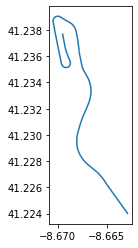

In [5]:
often10_gdf = utils.get_geom_gdf(often10)
display(often10_gdf.head())
often10_gdf[:5].plot()

Total number of LineString: 10


,geometry
0,"LINESTRING (-8.56562 41.23496, -8.56584 41.234..."
1,"LINESTRING (-8.54876 41.20124, -8.54806 41.201..."
2,"LINESTRING (-8.57815 41.13535, -8.57804 41.135..."
3,"LINESTRING (-8.62242 41.16411, -8.62251 41.163..."
4,"LINESTRING (-8.63855 41.14989, -8.63786 41.150..."


<AxesSubplot:>

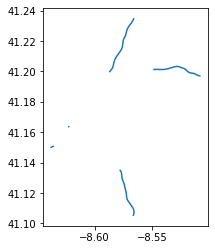

In [6]:
time10_gdf = utils.get_geom_gdf(time10)
display(time10_gdf.head())
time10_gdf[:5].plot()

## Visualize 5 routes that are traversed the most often

In [7]:
often10_coords = utils.get_lineString_coords(often10_gdf)
often10_coords

0    [(41.2299263, -8.6680157), (41.2301508, -8.667...
1    [(41.2239767, -8.6628618), (41.2250912, -8.663...
2    [(41.2261891, -8.664969), (41.2263972, -8.6651...
3    [(41.2271823, -8.6660102), (41.2276005, -8.666...
4    [(41.2363728, -8.6678023), (41.2370596, -8.667...
5    [(41.2048355, -8.6514432), (41.2049713, -8.651...
6    [(41.2098132, -8.651801), (41.2106614, -8.6521...
7    [(41.2121418, -8.6528284), (41.2129284, -8.653...
8    [(41.2214835, -8.6604663), (41.2220617, -8.661...
9    [(41.2220617, -8.6610392), (41.2224028, -8.661...
dtype: object

In [15]:
# adjust map coords
coord1, coord2 = utils.get_porto_coords(adjusted=False)
coord1 += 0.07
coord2 -= 0.02

fmap = folium.Map((coord1, coord2), zoom_start=14, tiles=ftiles[0], zoom_control = False)
# Fit to bounds
bounds = utils.get_global_xy_bounds(often10_coords[:5])
fmap.fit_bounds(bounds)

# PLOT_POINTS = False
for idx, lcoord in enumerate(often10_coords[:5]):
    feature_group = folium.FeatureGroup()
    if PLOT_LINES:
        feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx], weight=5))
    if PLOT_POINTS:
        for p in lcoord:
            feature_group.add_child(folium.Circle(p, radius=1, color=colors_list[idx], fill=True, fill_color=colors_list[idx], fill_opacity=1))
    fmap.add_child(feature_group)    

fmap

In [9]:
if SAVE_IMAGES:
    utils.save_fmap_plot(fmap, os.path.join(results_path, 'fmap_often5_all'))

## Visualize 5 longest average time routes

In [10]:
time10_coords = utils.get_lineString_coords(time10_gdf)
time10_coords

0    [(41.2349629, -8.565616), (41.2345388, -8.5658...
1    [(41.2012399, -8.5487643), (41.2012815, -8.548...
2    [(41.1353481, -8.5781473), (41.1352766, -8.578...
3    [(41.1641061, -8.6224174), (41.1636862, -8.622...
4    [(41.1498853, -8.6385542), (41.1501576, -8.637...
5    [(41.2363728, -8.6678023), (41.2370596, -8.667...
6    [(41.1572559, -8.6248537), (41.1573447, -8.624...
7    [(41.1456785, -8.6072865), (41.1456651, -8.607...
8    [(41.2322929, -8.6928995), (41.2322399, -8.692...
9    [(41.1524873, -8.6180312), (41.1525907, -8.616...
dtype: object

In [32]:
fmap = folium.Map(utils.get_porto_coords(), zoom_start=13, tiles=ftiles[2], zoom_control = False)
bounds = utils.get_global_xy_bounds(time10_coords[:5])
fmap.fit_bounds(bounds)

for idx, lcoord in enumerate(time10_coords[:5]):
    feature_group = folium.FeatureGroup()
    if PLOT_LINES:
        feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx+5], weight=5)) # +5 to skip colors
    if PLOT_POINTS:
        for p in lcoord:
            feature_group.add_child(folium.Circle(p, radius=1, color=colors_list[idx+5], fill=True, fill_color=colors_list[idx], fill_opacity=1))
    fmap.add_child(feature_group)    

fmap

In [33]:
if SAVE_IMAGES:
    utils.save_fmap_plot(fmap, os.path.join(results_path, 'fmap_time5_all'))

In [34]:
if SAVE_INDIVIDUAL:
    for idx, lcoord in enumerate(time10_coords[:5]):
        fmap = folium.Map(utils.get_porto_coords(), zoom_start=12, tiles=ftiles[0], zoom_control = False)
        bounds = utils.get_xy_bounds(lcoord)
        fmap.fit_bounds(bounds)
        feature_group = folium.FeatureGroup()
        if PLOT_LINES:
            feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx+5], weight=5))
        if PLOT_POINTS:
            for p in lcoord:
                feature_group.add_child(folium.Circle(p, radius=1, color=colors_list[idx+5], fill=True, fill_color=colors_list[idx], fill_opacity=1))
        fmap.add_child(feature_group)
        utils.save_fmap_plot(fmap, os.path.join(results_path, f'fmap_time5_{idx}'))

In [31]:
lcoord = time10_coords[3]
bounds = utils.get_xy_bounds(lcoord)
fmap = folium.Map(utils.get_porto_coords(), zoom_start=12, tiles=ftiles[0], zoom_control = False)
fmap.fit_bounds(bounds)
feature_group = folium.FeatureGroup()
if PLOT_LINES:
    feature_group.add_child(folium.PolyLine(lcoord, color=colors_list[idx+5], weight=5))
if PLOT_POINTS:
    for p in lcoord:
        feature_group.add_child(folium.Circle(p, radius=1, color=colors_list[idx+5], fill=True, fill_color=colors_list[idx], fill_opacity=1))
fmap.add_child(feature_group)
